In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into a Pandas DataFrame
data = pd.read_csv('stocks.csv')

In [4]:
# Display first few rows
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


# Data Preprocessing

In [5]:
# Check for missing values
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# Add calculated columns
data['Daily Return'] = data.groupby('Ticker')['Adj Close'].pct_change()
data['Price Range'] = data['High'] - data['Low']

In [8]:
# Display updated dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ticker        248 non-null    object        
 1   Date          248 non-null    datetime64[ns]
 2   Open          248 non-null    float64       
 3   High          248 non-null    float64       
 4   Low           248 non-null    float64       
 5   Close         248 non-null    float64       
 6   Adj Close     248 non-null    float64       
 7   Volume        248 non-null    int64         
 8   Daily Return  244 non-null    float64       
 9   Price Range   248 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 19.5+ KB


In [9]:
# Replace NaN values in 'Daily Return' with 0
data['Daily Return'].fillna(0, inplace=True)

In [10]:
# Confirm no more missing values
data.isnull().sum()

Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
Price Range     0
dtype: int64

In [11]:
# Number of unique values
data.nunique()

Ticker            4
Date             62
Open            244
High            248
Low             248
Close           244
Adj Close       244
Volume          248
Daily Return    245
Price Range     241
dtype: int64

In [12]:
print("Duplicated rows:", data.duplicated().sum())

Duplicated rows: 0


In [13]:
# Descriptive statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Price Range
count,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000,248.000000
mean,2023-03-22 22:27:05.806451712,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07,0.000718,5.222210
min,2023-02-07 00:00:00,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06,-0.074417,0.839996
25%,2023-03-01 00:00:00,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07,-0.010469,2.507496
50%,2023-03-22 12:00:00,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07,-0.000509,4.095013
75%,2023-04-14 00:00:00,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07,0.010506,7.037483
max,2023-05-05 00:00:00,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08,0.090065,18.639984
std,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07,0.018867,3.628464


# EDA

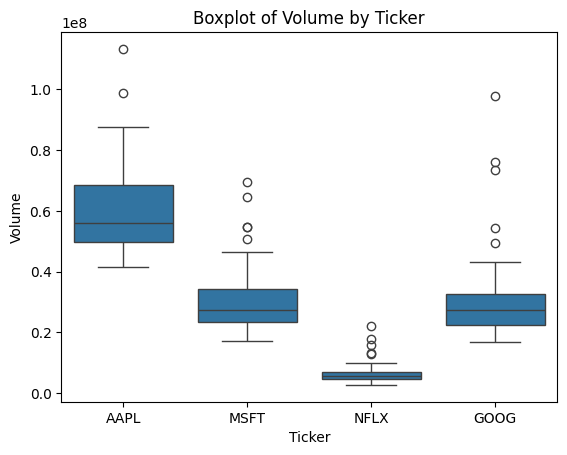

In [14]:
# Boxplot
sns.boxplot(data=data, x='Ticker', y='Volume')
plt.title("Boxplot of Volume by Ticker")
plt.show()

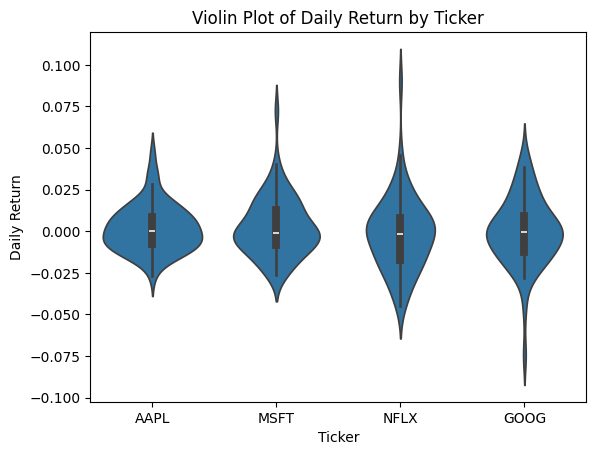

In [15]:
# Violin plot
sns.violinplot(data=data, x='Ticker', y='Daily Return')
plt.title("Violin Plot of Daily Return by Ticker")
plt.show()

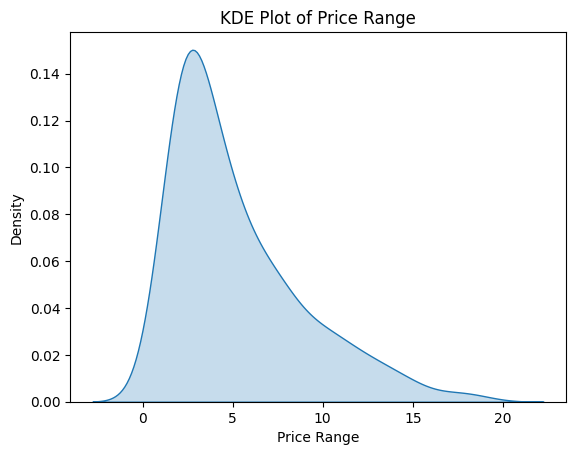

In [18]:
# KDE plot
sns.kdeplot(data['Price Range'], fill=True)
plt.title("KDE Plot of Price Range")
plt.show()

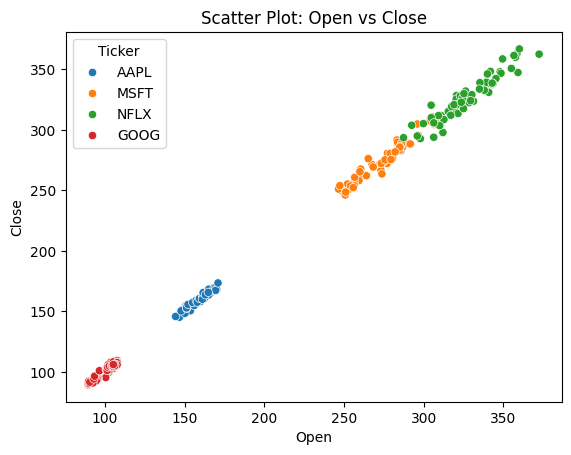

In [19]:
# Scatter plot
sns.scatterplot(data=data, x='Open', y='Close', hue='Ticker')
plt.title("Scatter Plot: Open vs Close")
plt.show()

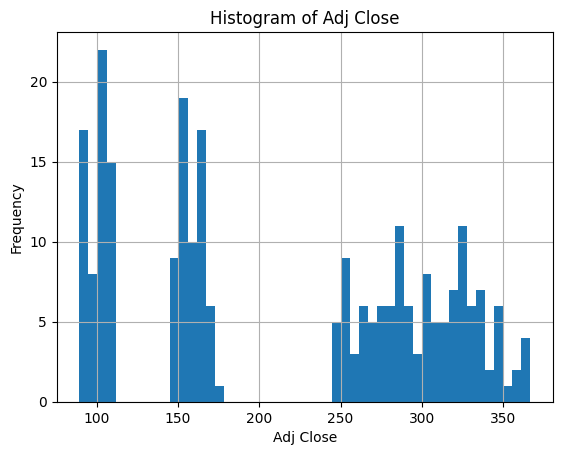

In [21]:
# Histogram
data['Adj Close'].hist(bins=50)
plt.xlabel('Adj Close')
plt.ylabel('Frequency')
plt.title("Histogram of Adj Close")
plt.show()

In [22]:
data['Ticker'].value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [24]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation = numeric_data.corr()

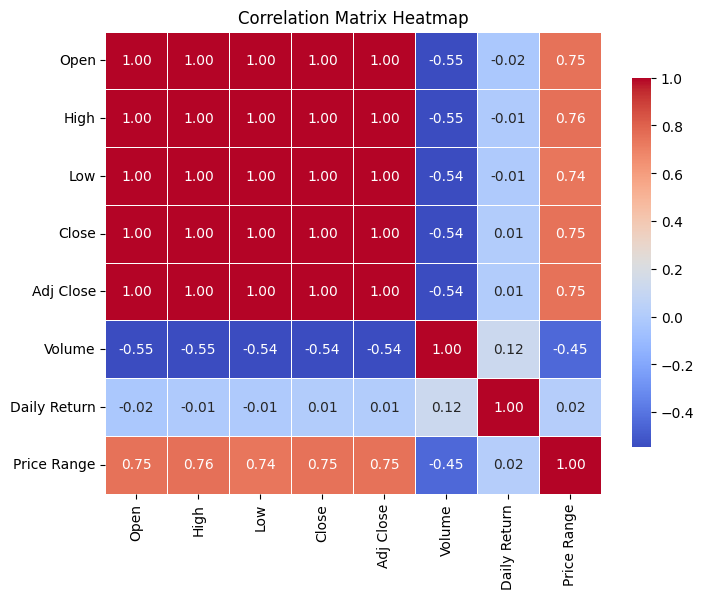

In [27]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')
plt.show()

# Task 1: Trend Analysis

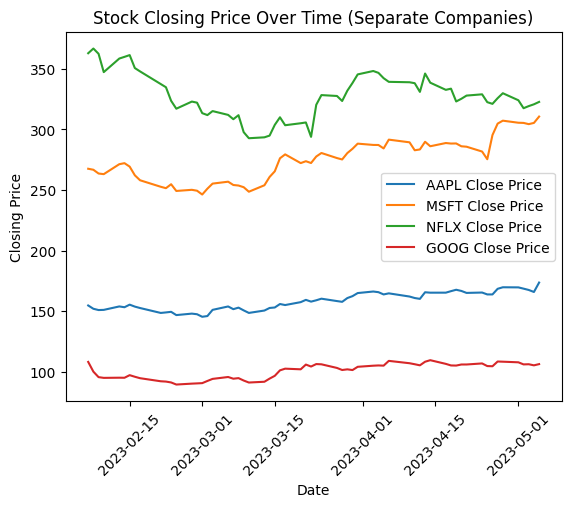

In [39]:
import matplotlib.pyplot as plt
# Get unique tickers
tickers = data['Ticker'].unique()
# Plot each ticker with a different color
for ticker in tickers:
    company_data = data[data['Ticker'] == ticker]
    plt.plot(company_data['Date'], company_data['Close'], label=f'{ticker} Close Price')
plt.title('Stock Closing Price Over Time (Separate Companies)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [41]:
import warnings
warnings.filterwarnings('ignore')

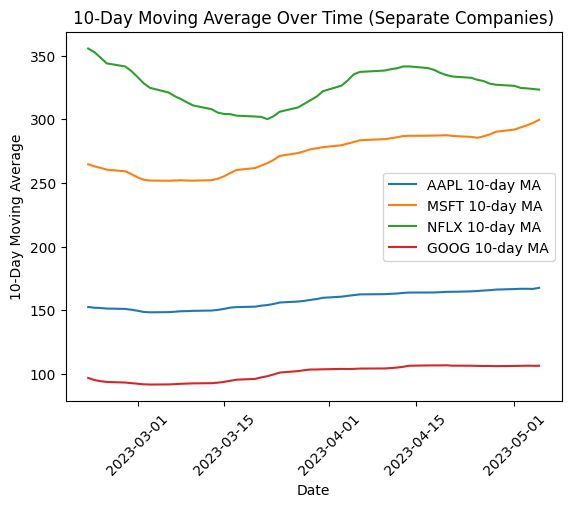

In [53]:
# Plot the 10-day moving average for each company
for ticker in tickers:
    company_data = data[data['Ticker'] == ticker]
    company_data['10_day_MA'] = company_data['Close'].rolling(window=10).mean()
    plt.plot(company_data['Date'], company_data['10_day_MA'], label=f'{ticker} 10-day MA')
plt.title('10-Day Moving Average Over Time (Separate Companies)')
plt.xlabel('Date')
plt.ylabel('10-Day Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Task 2: Volatility Assessment

In [44]:
import matplotlib.pyplot as plt
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()
# Get unique tickers
tickers = data['Ticker'].unique()

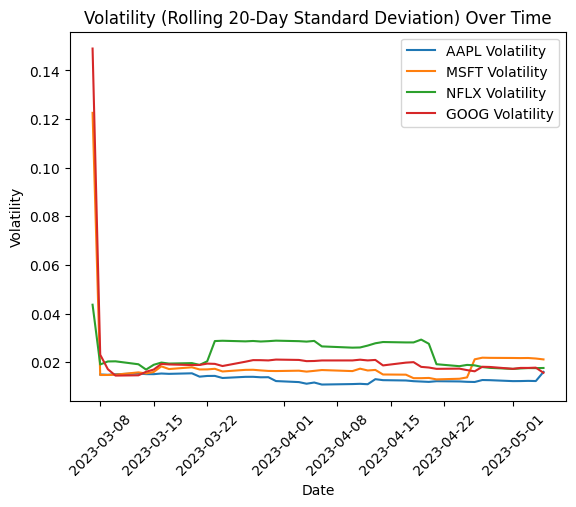

In [48]:
# Plot the rolling standard deviation (volatility) for each company
for ticker in tickers:
    company_data = data[data['Ticker'] == ticker]
    company_data['Volatility'] = company_data['Daily Return'].rolling(window=20).std()
    plt.plot(company_data['Date'], company_data['Volatility'], label=f'{ticker} Volatility')
plt.title('Volatility (Rolling 20-Day Standard Deviation) Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Task 3: Correlation Study

In [49]:
import seaborn as sns
# Calculate correlation matrix between the closing prices
correlation = data.pivot_table(index='Date', columns='Ticker', values='Close').corr()

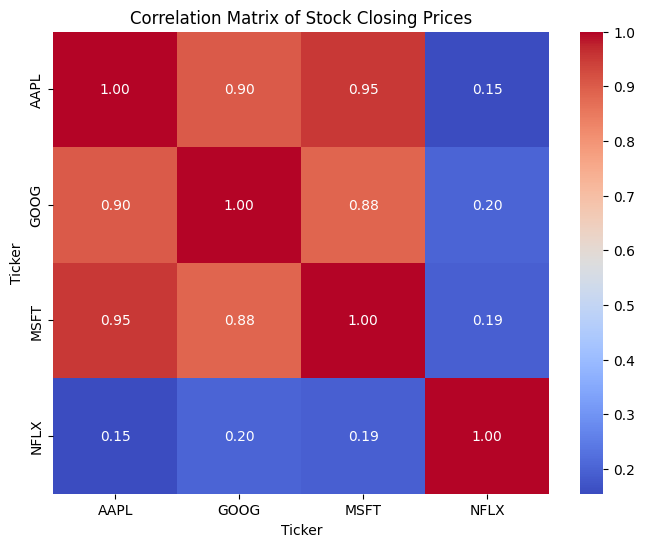

In [50]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Stock Closing Prices")
plt.show()

# Task 4: Risk-Return Trade-Off Analysis

In [51]:
# Calculate the mean and standard deviation of the daily returns
risk_return = data.groupby('Ticker')['Daily Return'].agg(['mean', 'std'])

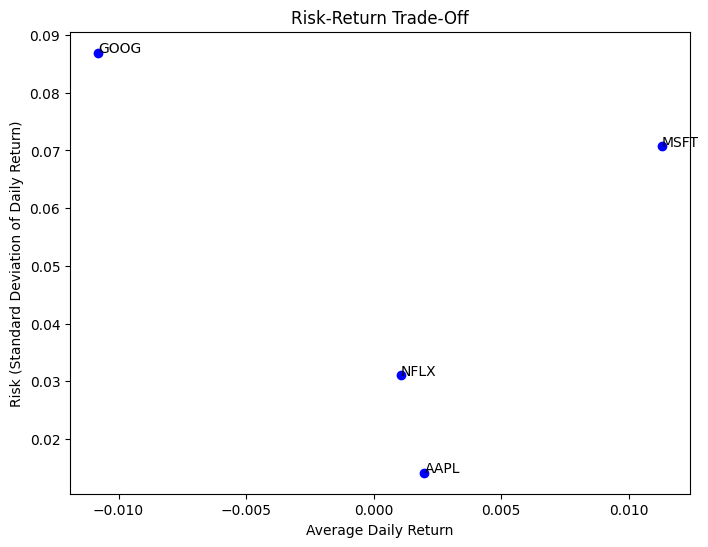

In [52]:
# Plotting risk vs return for each stock
plt.figure(figsize=(8, 6))
plt.scatter(risk_return['mean'], risk_return['std'], color='blue')
# Adding labels for each stock
for i, txt in enumerate(risk_return.index):
    plt.annotate(txt, (risk_return['mean'][i], risk_return['std'][i]))
plt.title('Risk-Return Trade-Off')
plt.xlabel('Average Daily Return')
plt.ylabel('Risk (Standard Deviation of Daily Return)')
plt.show()